In [52]:
from torch.utils.data import Dataset
import os
import glob
from PIL import Image
from torchvision import transforms

class Hotdog_NotHotdog(Dataset):
    def __init__(self, train : bool, image_size : int = 32):
        if train:
            self.transform = transforms.Compose([
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                transforms.RandomRotation(degrees=10),
                transforms.Resize((image_size, image_size)),
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomVerticalFlip(0.2),
                transforms.ToTensor(),
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize((image_size, image_size)),
                transforms.ToTensor(),
            ])
        data_path = os.path.join('hotdog_nothotdog', 'train' if train else 'test')
        image_classes = [os.path.split(d)[1] for d in glob.glob(data_path +'/*') if os.path.isdir(d)]
        image_classes.sort()
        self.name_to_label = {c: id for id, c in enumerate(image_classes)}
        self.image_paths = glob.glob(data_path + '/*/*.jpg')
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        
        image = Image.open(image_path)
        c = os.path.split(os.path.split(image_path)[0])[1]
        y = self.name_to_label[c]
        X = self.transform(image)
        X = 2 * X - 1
        return {
            'input': X,
            'target': y,
        }

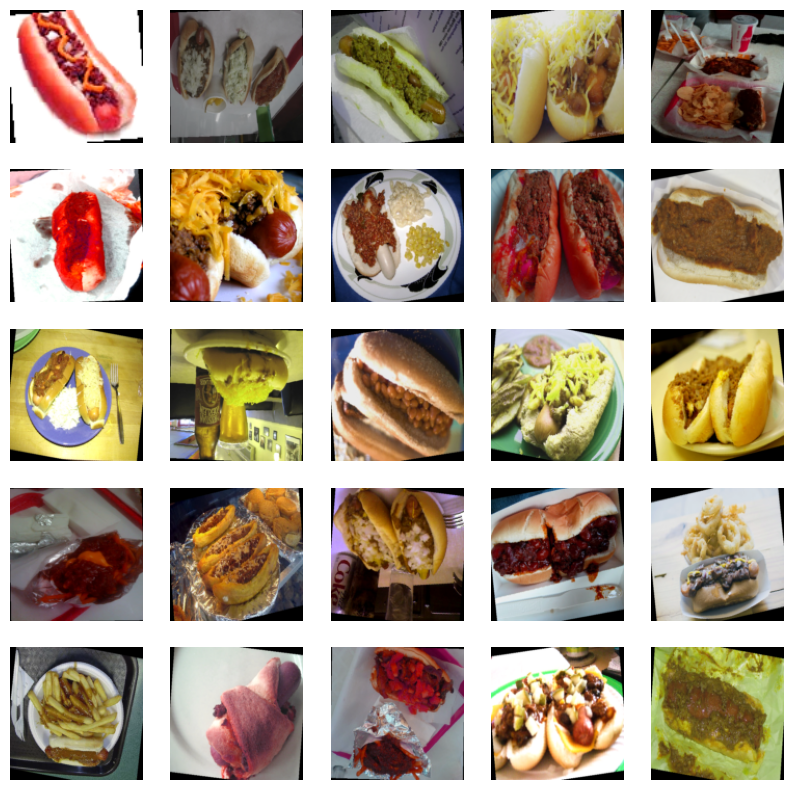

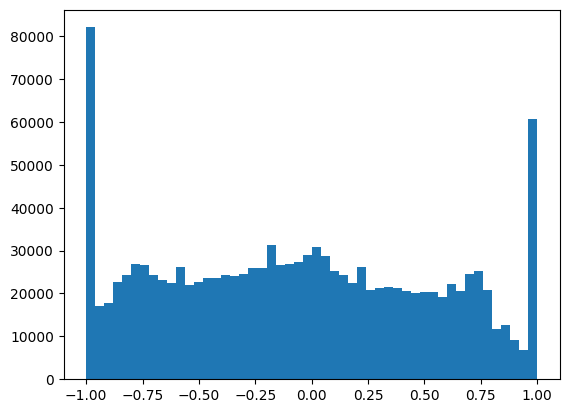

In [53]:
import matplotlib.pyplot as plt
import torch
import numpy as np

dataset = Hotdog_NotHotdog(train=True, image_size=128)

batch = torch.stack([
    dataset[i]['input'] for i in range(25)
]).permute(0, 2, 3, 1)

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs : list[plt.Axes]
axs = axs.flatten()

for i in range(25):
    img = batch[i]
    img = (img + 1) / 2
    axs[i].imshow(img.numpy())
    axs[i].axis('off')
    
plt.show()

plt.hist(batch.flatten(), bins=50)
plt.show()